In [1]:
import time
import datetime
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [2]:
PATH = r'C:\Users\44738\Desktop\Desktop Files\Dissertation\stock_list.csv'
all_tickers = pd.read_csv(PATH)
start_date = '2016-07-01'
end_date = '2021-07-01'

In [3]:
all_tickers = all_tickers.iloc[:30]

In [4]:
all_tickers

,stocks
0,HD
1,MMM
2,TSLA
3,UNH
4,BA
5,MCD
6,TRV
7,XOM
8,GS
9,RTX


In [5]:
tickers = ["^DJI", "HD"]

In [6]:
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
return_df = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in tickers:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    return_df = pd.concat([return_df, df], axis=1)

In [7]:
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
balanced = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in all_tickers['stocks']:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    balanced = pd.concat([balanced, df], axis=1)

In [8]:
balanced

,HD,MMM,TSLA,UNH,BA,MCD,TRV,XOM,GS,RTX,...,INTC,KO,MSFT,WMT,MRK,PFE,AAPL,JNJ,VZ,CAT
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,114.701279,150.359390,43.299999,130.385345,118.344154,105.560135,105.583214,71.979073,135.552475,56.968307,...,28.593260,38.284912,47.041512,65.140999,47.548428,27.684841,22.361248,105.557190,44.587479,66.265472
2016-07-05,114.462364,150.436508,42.796001,131.033310,115.862114,105.875748,105.432190,71.350098,132.077881,55.798225,...,28.532145,38.547947,47.050705,65.436226,47.597668,27.871635,22.151365,106.410057,44.825371,64.471237
2016-07-06,116.426857,150.033920,42.888000,131.792343,115.852982,105.761757,105.503250,72.170845,133.111115,56.219677,...,28.785343,38.412182,47.243805,66.044617,48.549622,27.910551,22.277292,106.732071,45.061649,64.861282
2016-07-07,116.064072,149.785522,43.188000,130.329819,116.044609,106.016006,104.392799,71.304077,134.409546,56.546856,...,28.986137,38.259453,47.243805,65.785156,48.237778,27.840502,22.372902,106.618935,44.356812,65.051971
2016-07-08,118.878029,151.712784,43.355999,130.764877,118.709160,106.357941,104.899162,71.748970,137.500015,57.484039,...,29.684607,38.505524,48.089737,66.062500,48.705551,28.112913,22.545471,106.914841,44.773308,67.062904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,312.043488,193.274628,671.869995,404.950012,248.380005,231.152740,151.720001,63.695919,366.986755,86.202606,...,55.549023,54.320000,264.513611,138.022095,77.199997,38.630119,132.910873,163.239975,55.753666,215.155365
2021-06-28,312.690216,195.011368,688.719971,401.459991,239.960007,229.829987,149.449997,62.070515,366.927063,84.602211,...,57.108887,54.259998,268.206543,137.593674,76.860001,38.768864,134.578369,163.051102,55.555885,215.115585
2021-06-29,316.630157,194.544922,680.760010,398.100006,235.759995,229.113907,149.520004,61.686333,370.818146,83.936211,...,56.383602,53.860001,270.881409,136.796600,77.209999,38.749043,136.126053,163.061035,55.219666,213.951843


In [9]:
balanced_return = balanced.pct_change()[1:]
weights = [1/len(balanced.columns)] * len(balanced.columns)
balanced_weighted = (weights * balanced_return)
balanced_weighted

,HD,MMM,TSLA,UNH,BA,MCD,TRV,XOM,GS,RTX,...,INTC,KO,MSFT,WMT,MRK,PFE,AAPL,JNJ,VZ,CAT
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,-0.000069,0.000017,-0.000388,0.000166,-0.000699,0.000100,-0.000048,-0.000291,-0.000854,-0.000685,...,-0.000071,0.000229,0.000007,0.000151,0.000035,0.000225,-0.000313,0.000269,0.000178,-0.000903
2016-07-06,0.000572,-0.000089,0.000072,0.000193,-0.000003,-0.000036,0.000022,0.000383,0.000261,0.000252,...,0.000296,-0.000117,0.000137,0.000310,0.000667,0.000047,0.000189,0.000101,0.000176,0.000202
2016-07-07,-0.000104,-0.000055,0.000233,-0.000370,0.000055,0.000080,-0.000351,-0.000400,0.000325,0.000194,...,0.000233,-0.000133,0.000000,-0.000131,-0.000214,-0.000084,0.000143,-0.000035,-0.000521,0.000098
2016-07-08,0.000808,0.000429,0.000130,0.000111,0.000765,0.000108,0.000162,0.000208,0.000766,0.000552,...,0.000803,0.000214,0.000597,0.000141,0.000323,0.000326,0.000257,0.000093,0.000313,0.001030
2016-07-11,0.000201,0.000167,0.001230,-0.000224,0.000500,0.000190,0.000011,0.000125,0.000401,0.000096,...,0.000373,0.000140,0.000185,0.000099,-0.000006,0.000028,0.000103,0.000022,0.000018,0.000185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,0.000191,0.000257,-0.000390,0.000508,-0.000291,-0.000130,0.000389,0.000072,0.000002,-0.000050,...,-0.000095,-0.000043,-0.000209,0.000394,0.000367,-0.000179,-0.000075,0.000171,0.000006,-0.000460
2021-06-28,0.000069,0.000300,0.000836,-0.000287,-0.001130,-0.000191,-0.000499,-0.000851,-0.000005,-0.000619,...,0.000936,-0.000037,0.000465,-0.000103,-0.000147,0.000120,0.000418,-0.000039,-0.000118,-0.000006
2021-06-29,0.000420,-0.000080,-0.000385,-0.000279,-0.000583,-0.000104,0.000016,-0.000206,0.000353,-0.000262,...,-0.000423,-0.000246,0.000332,-0.000193,0.000152,-0.000017,0.000383,0.000002,-0.000202,-0.000180


In [10]:
balanced_portfolio = pd.DataFrame(balanced_weighted.sum(axis=1)).rename(columns={0:'DJIA Balanced'})
balanced_portfolio

,DJIA Balanced
Date,
2016-07-05,-0.005016
2016-07-06,0.004257
2016-07-07,-0.001284
2016-07-08,0.013566
2016-07-11,0.005209
...,...
2021-06-25,0.007505
2021-06-28,-0.004147
2021-06-29,-0.000971


In [11]:
cumu_balanced = (balanced_portfolio + 1).cumprod()
cumu_balanced = cumu_balanced - 1

In [12]:
cumu_balanced = cumu_balanced * 100

In [13]:
cumulative_balanced = (balanced + 1).cumprod()

In [14]:
returns = return_df.pct_change()

In [15]:
cumulative_ret = (returns + 1).cumprod()

In [16]:
cumulative_ret = cumulative_ret - 1

In [17]:
cumulative_ret = cumulative_ret * 100

In [18]:
diss_col_dict = {
    'blue':'#00D9C0',
    'red':'#FF4365',
    'grey':'#B7AD99'
}

In [19]:
""" ADD DISCLOSURE OF WHY EQUALLY WEIGHTED REPLICATION IS USED - DUE TO DIFFERING WEIGHTING METHODS
    EXPLAIN THIS WEIGHTING DECISION??
"""

' ADD DISCLOSURE OF WHY EQUALLY WEIGHTED REPLICATION IS USED - DUE TO DIFFERING WEIGHTING METHODS\n    EXPLAIN THIS WEIGHTING DECISION??\n'

AttributeError: 'numpy.ndarray' object has no attribute 'spines'

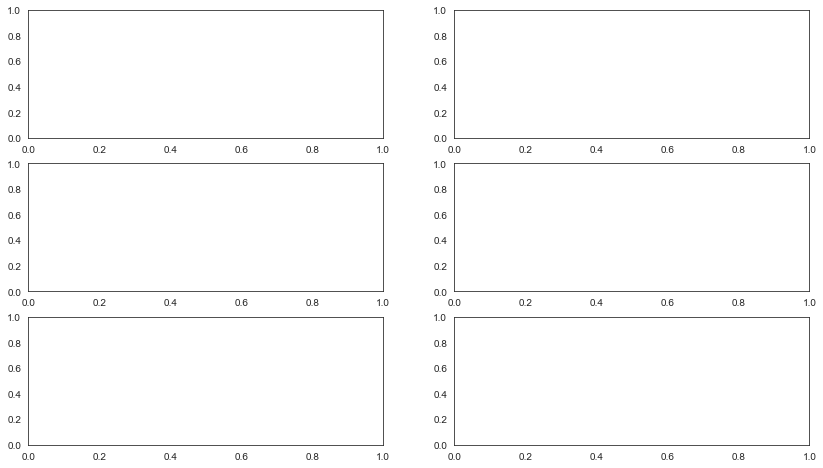

In [23]:
fig, ax = plt.subplots(3,2, figsize=(14,8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Return (%)', fontsize=28, fontname='Calibri', fontweight='light', labelpad=6, color='#1C3144', rotation='horizontal', horizontalalignment='left', y=1.01)
plt.xticks(fontsize=24, fontname='Calibri', weight='light', color='#1C1344')
plt.yticks(fontsize=24, fontname='Calibri', weight='light', color='#1C1344')

plt.suptitle(t='5-year DJIA Screened and Un-Screened Cumulative Returns', fontsize=36, color='#1C3144', fontname='Calibri', weight='ultralight', y=1.05)
ax.plot(cumulative_ret['^DJI'], color='#1C3144', lw=2, label='DJIA')
ax.plot(cumu_balanced, color='#D00000', lw=2, label='DJIA Equally Weighted Un-screened')
ax.plot(cumulative_ret['HD'], color='#FFBA08', lw=2, label='DJIA Equally Weighted Screened')
L = ax.legend(frameon=False, loc='upper left', fontsize=22)
plt.setp(L.texts, family='Calibri', weight='light', color='#1C3144')

In [20]:
def value_at_risk(returns, confidence_level=.05):
    
    print('VaR:', returns.quantile(confidence_level, interpolation='higher'))
    # Calculating VaR
    return returns.quantile(confidence_level, interpolation='higher')

In [21]:
def expected_shortfall(returns, confidence_level=.05):
    
    # Calculating VaR
    var = value_at_risk(returns, confidence_level)
    print('ES: ', returns[returns.lt(var)].mean())
    # ES is the average of the worst losses (under var)
    return returns[returns.lt(var)].mean()

C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.165, 0.55, '^DJI EW Screened ES: -3.81%')

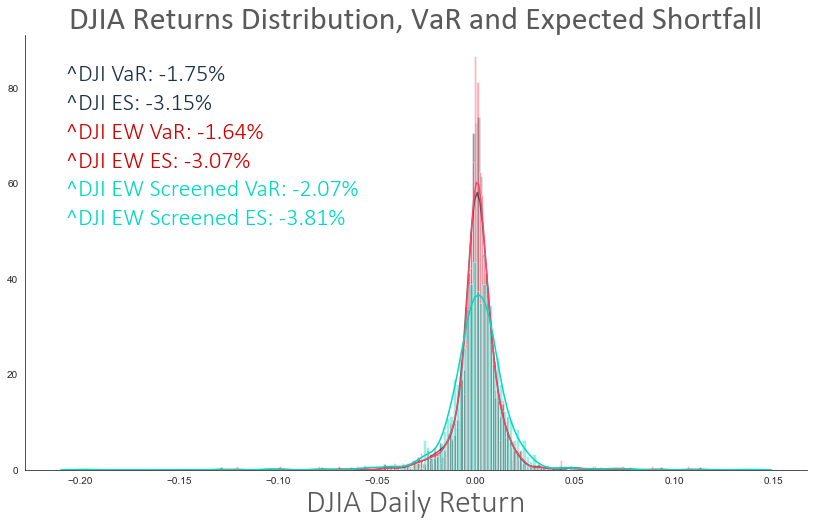

In [26]:
fig, ax = plt.subplots(figsize = (14,8))
sns.distplot(returns['^DJI'], color=(0,0,0,0.55), bins=200)
sns.distplot(balanced_portfolio, color=diss_col_dict['red'], bins=200)
sns.distplot(returns['HD'], color=diss_col_dict['blue'], bins=200)
ax.set_ylabel('')
ax.set_xlabel ('DJIA Daily Return', fontsize = 32, fontname='Calibri', weight='light', color=(0,0,0,0.65))
ax.set_title('DJIA Returns Distribution, VaR and Expected Shortfall', fontsize = 32, fontname='Calibri', weight='normal', color=(0,0,0,0.65))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.text(x=0.165, y=0.80, s='^DJI VaR: -1.75%', fontdict={'fontname':'calibri', 'weight':'light', 'size':24, 'color':'#1C3144'})
fig.text(x=0.165, y=0.75, s='^DJI ES: -3.15%', fontdict={'fontname':'calibri', 'weight':'light', 'size':24, 'color':'#1C3144'})
fig.text(x=0.165, y=0.70, s='^DJI EW VaR: -1.64%', fontdict={'fontname':'calibri', 'weight':'light', 'size':24, 'color':'#D00000'})
fig.text(x=0.165, y=0.65, s='^DJI EW ES: -3.07%', fontdict={'fontname':'calibri', 'weight':'light', 'size':24, 'color':'#D00000'})
fig.text(x=0.165, y=0.60, s='^DJI EW Screened VaR: -2.07%', fontdict={'fontname':'calibri', 'weight':'light', 'size':24, 'color':diss_col_dict['blue']})
fig.text(x=0.165, y=0.55, s='^DJI EW Screened ES: -3.81%', fontdict={'fontname':'calibri', 'weight':'light', 'size':24, 'color':diss_col_dict['blue']})


In [27]:
expected_shortfall(balanced_portfolio)

VaR: DJIA Balanced   -0.016434
Name: 0.05, dtype: float64
ES:  DJIA Balanced   -0.030658
dtype: float64


DJIA Balanced   -0.030658
dtype: float64

C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

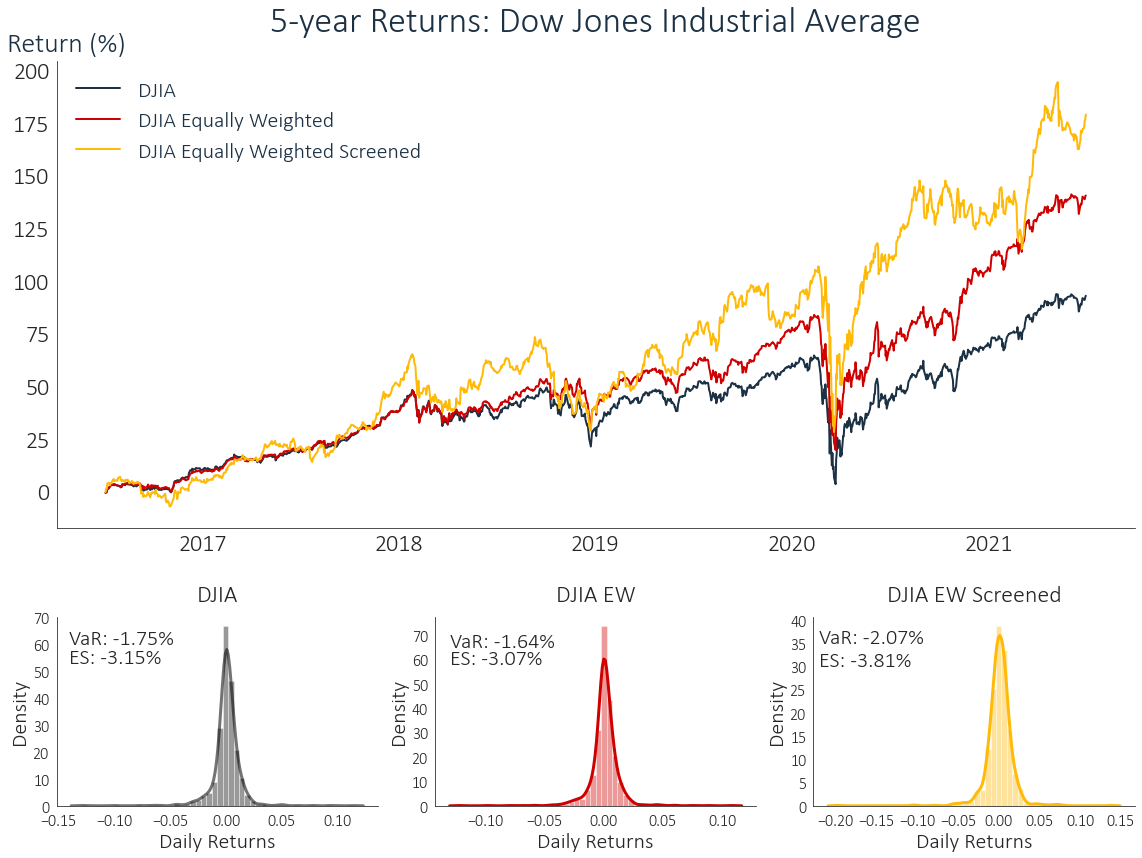

In [22]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot2grid((6, 3), (0,0), rowspan=4, colspan=3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.xticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2 = plt.subplot2grid((6, 3), (4,0), rowspan=2, colspan=1)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.set_title("DJIA", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax3 = plt.subplot2grid((6, 3), (4,1), rowspan=2, colspan=1)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_title("DJIA EW", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax4 = plt.subplot2grid((6, 3), (4,2), rowspan=2, colspan=1)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_title("DJIA EW Screened", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)

ax1.set_ylabel('Return (%)', fontsize=28, fontname='Calibri', fontweight='light', labelpad=6, color='#1C3144', rotation='horizontal', horizontalalignment='left', y=1.01)

ax1.set_title(label='5-year Returns: Dow Jones Industrial Average', fontsize=36, color='#1C3144', fontname='Calibri', weight='ultralight', y=1.05)
ax1.plot(cumulative_ret['^DJI'], color='#1C3144', lw=2, label='DJIA')
ax1.plot(cumu_balanced, color='#D00000', lw=2, label='DJIA Equally Weighted')
ax1.plot(cumulative_ret['HD'], color='#FFBA08', lw=2, label='DJIA Equally Weighted Screened')
L = ax1.legend(frameon=False, loc='upper left', fontsize=22)
plt.setp(L.texts, family='Calibri', weight='light', color='#1C3144')

sns.distplot(returns['^DJI'], color=(0,0,0,0.55), bins=50, ax=ax2, kde_kws=dict(linewidth=3))
sns.distplot(balanced_portfolio, color='#D00000', bins=50, ax=ax3, kde_kws=dict(linewidth=3))
sns.distplot(returns['HD'], color='#FFBA08', bins=50, ax=ax4, kde_kws=dict(linewidth=3))

ax2.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.text(x=-0.14, y=60, s='VaR: -1.75%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax2.text(x=-0.14, y=53, s='ES: -3.15%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax3.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.text(x=-0.13, y=65, s='VaR: -1.64%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax3.text(x=-0.13, y=58, s='ES: -3.07%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax4.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.text(x=-0.22, y=35, s='VaR: -2.07%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax4.text(x=-0.22, y=30, s='ES: -3.81%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax2.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))


plt.tight_layout(h_pad=3) 
plt.savefig("DOW_Graph.jpeg", dpi=500)

In [30]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    print(sigma * sigma)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.01 #1% risk free rate

In [50]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

In [51]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

In [26]:
returns_frame = pd.concat([returns, balanced_portfolio], axis=1)

In [27]:
returns_frame.columns

Index(['^DJI', 'HD', 'DJIA Balanced'], dtype='object')

In [28]:
returns_frame = returns_frame[['^DJI', 'DJIA Balanced', 'HD']]
returns_frame.rename(columns={'^DJI':'Dow Jones', 'DJIA Balanced': 'DJIA EW', 'HD':'DJIA EW Screened'}, inplace=True)

In [35]:
sharpes = []
for col in returns_frame:
    sharpe = sharpe_ratio(returns_frame[col], N, rf)
    sharpes.append(sharpe)

0.040203606181893815
0.03874863405762743
0.06587361934161305


In [66]:
sortinos = []
for col in returns_frame:
    sortino = sortino_ratio(returns_frame[col], N, rf)
    sortinos.append(sortino)

In [67]:
dds = []
for col in returns_frame:
    dd = max_drawdown(returns_frame[col])
    dds.append(dd)

In [68]:
calmars = [0, 0, 0]
calmars[0] = returns_frame['Dow Jones'].mean()*255/abs(-0.33924960006097205)
calmars[1] = returns_frame['DJIA EW'].mean()*255/abs(-0.3900637330909167)
calmars[2] = returns_frame['DJIA EW Screened'].mean()*255/abs(-0.3864815399423005)
calmars

[0.45247717340353977, 0.5062038660916063, 0.6248723526330449]

In [69]:
var = [0, 0, 0]
var[0] = value_at_risk(returns_frame['Dow Jones'])
var[1] = value_at_risk(returns_frame['DJIA EW'])
var[2] = value_at_risk(returns_frame['DJIA EW Screened'])
var

VaR: -0.017516177717679993
VaR: -0.01643448032516296
VaR: -0.020716759297517817


[-0.017516177717679993, -0.01643448032516296, -0.020716759297517817]

In [70]:
es = [0, 0, 0]
es[0] = expected_shortfall(returns_frame['Dow Jones'])
es[1] = expected_shortfall(returns_frame['DJIA EW'])
es[2] = expected_shortfall(returns_frame['DJIA EW Screened'])
es

VaR: -0.017516177717679993
ES:  -0.031528604471187605
VaR: -0.01643448032516296
ES:  -0.03065826131823865
VaR: -0.020716759297517817
ES:  -0.03807411450637485


[-0.031528604471187605, -0.03065826131823865, -0.03807411450637485]

In [73]:
btstats = pd.DataFrame()
btstats['Sortino'] = sortinos
btstats['Sharpe'] = sharpes
btstats['Calmar'] = calmars
btstats['Max DD'] = dds
btstats['VaR'] = var
btstats['ES'] = es

btstats['temp'] = ['Dow Jones', 'DJIA EW', 'DJIA EW Screened']
btstats.set_index('temp', inplace=True)

In [74]:
btstats

,Sortino,Sharpe,Calmar,Max DD,VaR,ES
temp,,,,,,
Dow Jones,0.780871,0.715694,0.452477,-0.370862,-0.017516,-0.031529
DJIA EW,1.041232,0.952273,0.506204,-0.348621,-0.016434,-0.030658
DJIA EW Screened,1.033961,0.901983,0.624872,-0.379937,-0.020717,-0.038074


In [29]:
print(cumulative_ret.tail(3))
print(cumu_balanced.tail(3))

                 ^DJI          HD
Date                             
2021-06-29  91.050108  176.047600
2021-06-30  92.221306  176.611444
2021-07-01  92.951245  178.910101
            DJIA Balanced
Date                     
2021-06-29     138.770848
2021-06-30     140.072384
2021-07-01     140.525616


Start date,2016-07-01
End date,2021-07-01
Total months,59
,Backtest
Annual return,22.8%
Cumulative returns,178.9%
Annual volatility,25.5%
Sharpe ratio,0.94
Calmar ratio,0.60
Stability,0.93
Max drawdown,-38.0%


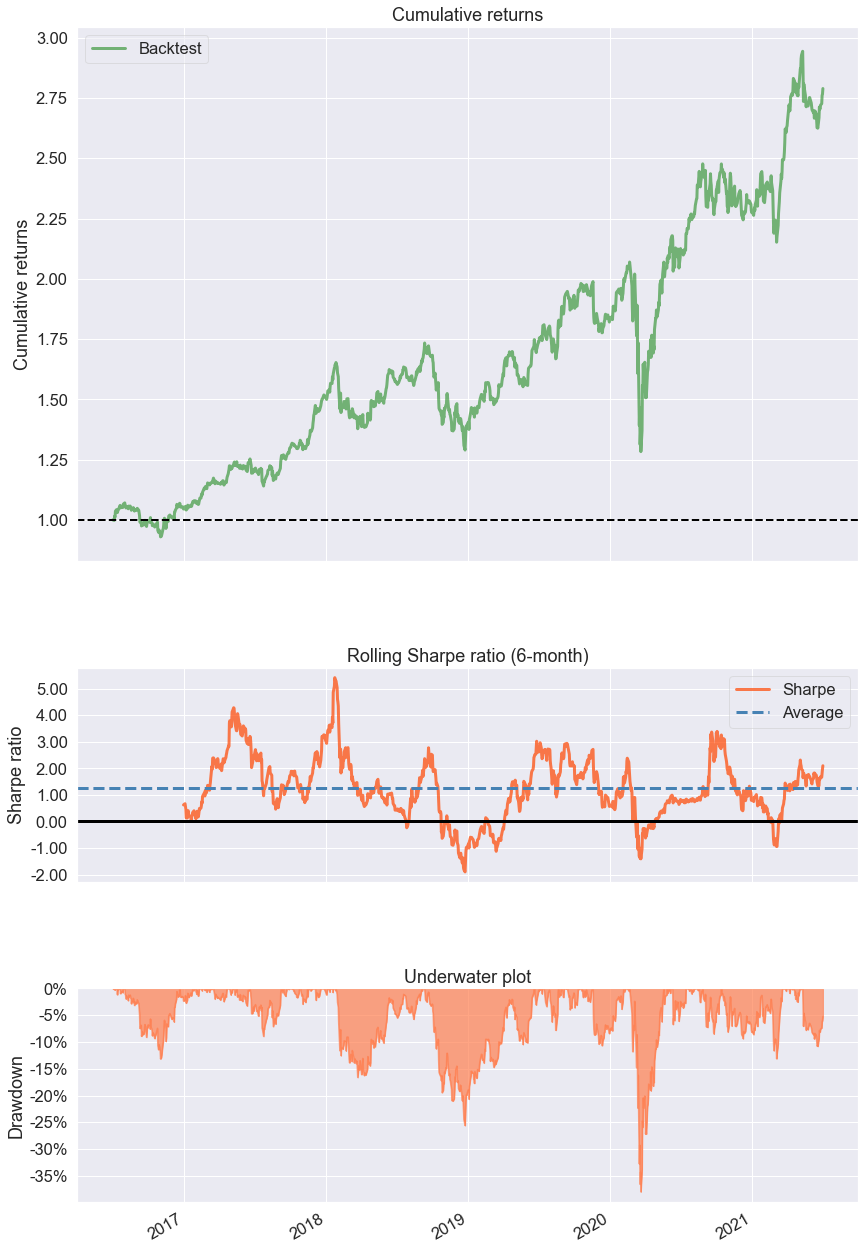

In [34]:
import pyfolio as pf
pf.create_simple_tear_sheet(returns_frame['DJIA EW Screened'])